### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the lesson:

Detect Credit Card Defaulters - Decision Tree I

---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

  https://colab.research.google.com/drive/1MPgs-QyqvqZXc3pRML1tOVUxS7cPHZM4

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project99** format.

4. Now, write your code in the prescribed code cells.


---

#### Problem Statement

In this project, you are going to analyse the diabetes dataset and model a decision tree classifier to diagnostically predict whether or not a patient has diabetes.

---

### Dataset Description

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

The dataset includes 768 instances with 7 features and 1 target column (`Outcome`) which can be briefed as:

|Field|Description|
|---:|:---|
|Pregnancies|Number of times pregnant|
|Glucose|Plasma glucose concentration in an oral glucose tolerance test|
|BloodPressure|Diastolic blood pressure (mm Hg)|
|SkinThickness|Triceps skin fold thickness (mm)|
|Insulin|2-Hour serum insulin (mu U/ml)|
|BMI|Body mass index (weight in $kg$ and height in $m^2$)|
|DiabetesPedigreeFunction|A function which scores likelihood of diabetes based on family history|
|Age|Age of the person|
|Outcome|0 - The person does not have diabetes|
||1 - The person has diabetes|

**Dataset Credits:** https://www.kaggle.com/uciml/pima-indians-diabetes-database


---

### List of Activities

**Activity 1:** Importing Modules and Reading Data

**Activity 2:** Renaming the Columns

**Activity 3:** Data Analysis
  
**Activity 4:** Decision Tree Classifier Design

---

#### Activity 1: Importing Modules and Reading Data

1. Import the necessary Python modules.

2. Read the data from a CSV file to create a Pandas DataFrame and go through the necessary data-cleaning process (if required).

  **Dataset Link:** https://s3-whjr-curriculum-uploads.whjr.online/b510b80d-2fd6-4c08-bfdf-2a24f733551d.csv


In [ ]:
# Import the modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Print the first five records
df = pd.read_csv('https://s3-whjr-curriculum-uploads.whjr.online/b510b80d-2fd6-4c08-bfdf-2a24f733551d.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Get the total number of rows and columns, data types of columns, and missing values (if exist) in the dataset.
print("Shape of dataframe","\n",df.shape)
print("-----"*10)
print("Datatypes of dataframe","\n",df.dtypes)
print("-----"*10)
print("Checking of null values of dataframe","\n",df.isnull().sum())


Shape of dataframe 
 (768, 9)
--------------------------------------------------
Datatypes of dataframe 
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
--------------------------------------------------
Checking of null values of dataframe 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Q:** Are there any missing values in the dataset?

**A:** No

**Q:** Are there any non-numeric columns? Is there any need for feature encoding?

**A:** No

---

#### Activity 2: Renaming the Columns

You can see that the column names don't have whitespaces between them. Rename the following column names as given below:

 - `BloodPressure` - `Blood_Pressure`

 - `SkinThickness` - `Skin_Thickness`

 - `DiabetesPedigreeFunction` - `Pedigree_Function`

In [ ]:
# Replace the column names in the DataFrame with the above names.
df.rename(columns = {"BloodPressure": "Blood_Pressure",
                     "SkinThickness": "Skin_Thickness",
                    "DiabetesPedigreeFunction": "Pedigree_Function",}, inplace = True)

---

#### Activity 3: Data Analysis

Analyse the data to find any similarities between the Diabetic and Non-diabetic people.

For this, create a correlation matrix for the entire dataset to get the top correlated features in diabetes:

In [ ]:
df.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


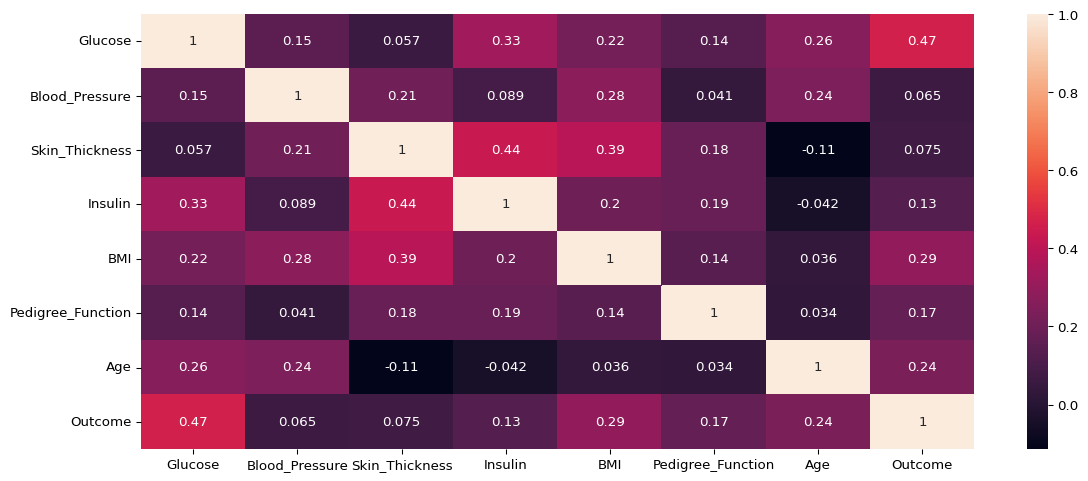

In [ ]:
# Create a correlation heatmap.
plt.figure(figsize = (14,6),dpi= 96)
sns.heatmap(df.iloc[:,1:].corr(),annot = True)
plt.show()

**Q**: What are the top three correlated features with the target column?

**A**: `Glucose,BMI and Age` are the top three correlated features with the target column.


Split the DataFrame into two sub-DataFrames, one for persons having diabetes (i.e. `Outcome` = 1) and the other for non-diabetic people (i.e. `Outcome` = 0).

**Note:** Build the DataFrames using only the top three correlated features i.e the sub DataFrames must have only three columns that represents the highly correlated features.

In [ ]:
df.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Split the DataFrame into Diabetic and non-diabetic DataFrames.
diabetic_df = df[df['Outcome']==1].loc[:,['Glucose','BMI','Age','Outcome']]
non_diabetic_df = df[df['Outcome']==0].loc[:,['Glucose','BMI','Age','Outcome']]

Create the pairplots for both the DataFrames:

<Figure size 1512x360 with 0 Axes>

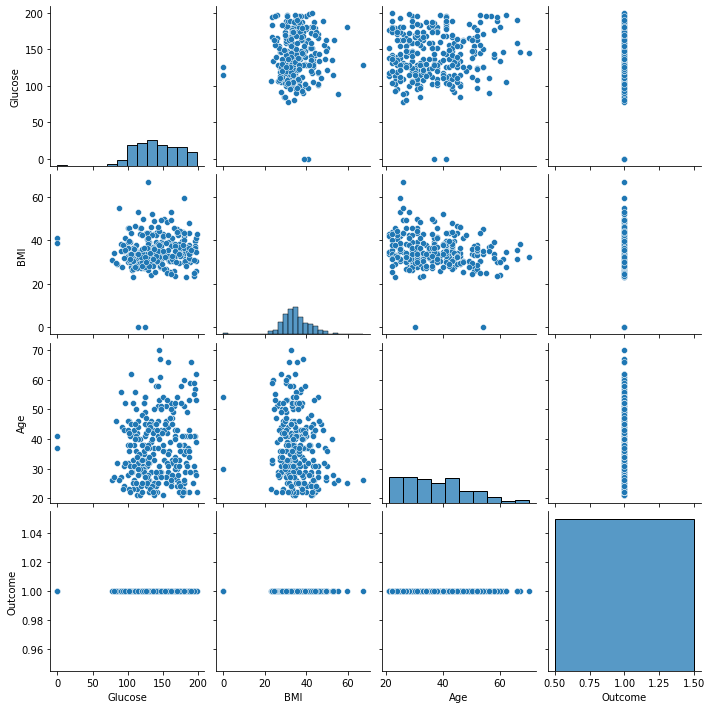

In [ ]:
# Create the pairplot for diabetic DataFrame
plt.figure(figsize=(21,5))
sns.pairplot(diabetic_df)
plt.show()

<Figure size 1512x360 with 0 Axes>

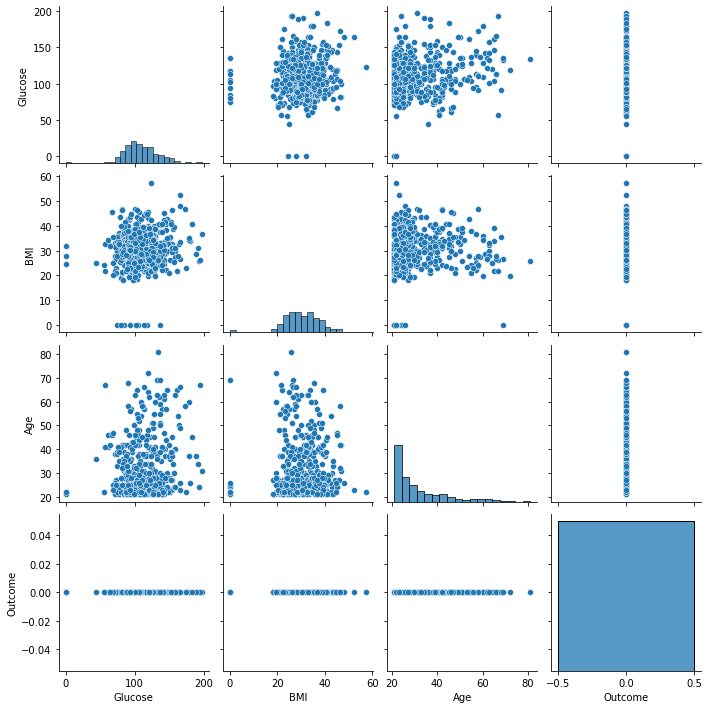

In [ ]:
# Create the pairplots for non-diabetic DataFrame.
plt.figure(figsize=(21,5))
sns.pairplot(non_diabetic_df)
plt.show()

**Q**: Write your observations from the above two pairplots.

**A**: The observation from above two pair plots is that it has different labels(X-axis  & y-axis) for different columns and in the same it has diiferent types plots in the y-axis.

---

#### Activity 4: Decision Tree Classifier Design

1. Split the original DataFrame into train and test sets.

2. Create an object (say `dtree_clf`) of the `DecisionTreeClassifier()` constructor.

3. Call the `fit()` function on the above constructor with train features and target variables as inputs.

4. Get the predicted target values for both train and test sets by calling the `predict()` function on `dtree_clf`.

5. Get the accuracy score on both train and test sets by calling the `accuracy_score()` function on the `metrics` object.



In [ ]:
df.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_columns = list(df.columns)
feature_columns

['Pregnancies',
 'Glucose',
 'Blood_Pressure',
 'Skin_Thickness',
 'Insulin',
 'BMI',
 'Pedigree_Function',
 'Age',
 'Outcome']

In [ ]:
# Create the feature and target dataset for training and testing the model.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
# Remove the 'Skin_Thickness' column and the target column from the feature columns
feature_columns = list(df.columns)
feature_columns.remove('Outcome')
feature_columns.remove('Skin_Thickness')

X = df[feature_columns]
y = df['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =30)

# Modeling a decision tree.

dtree_clf = DecisionTreeClassifier(random_state = 20)
dtree_clf.fit(X_train,y_train)
y_test_pred = dtree_clf .predict(X_test)
y_train_pred = dtree_clf.predict(X_train)

Also plot a confusion matrix for the train set by using the `plot_confusion_matrix()` function of the `sklearn.metrics` module.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       341
           1       1.00      1.00      1.00       196

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


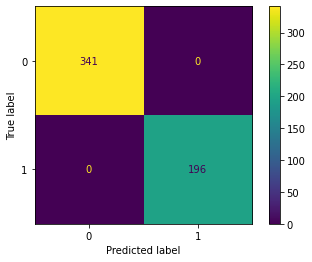

In [ ]:
# Plot a confusion matrix and print a classification report for the train set.
print(plot_confusion_matrix(dtree_clf,X_train,y_train,values_format='d'))
print(classification_report(y_train,y_train_pred))

**Hint:** The syntax for `plot_confusion_matrix()` function is:

`plot_confusion_matrix(estimator, X, y_true, values_format)`







**Q**: Write the f1-scores and the number of misclassified values in the train set.

**A**: The f1-scores is `1` for both the labels and the number of misclassified values in the train set is `341`.

 Plot a confusion matrix for the test set:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.79      0.81       159
           1       0.59      0.65      0.62        72

    accuracy                           0.75       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.76      0.75      0.75       231



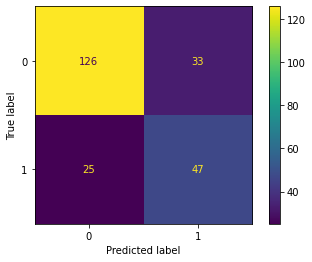

In [ ]:
# Plot a confusion matrix and print a classification report for the test set.
print(plot_confusion_matrix(dtree_clf,X_test,y_test,values_format='d'))
print(classification_report(y_test,y_test_pred))

**Q**: What is the f1-scores of the in test set?

**A**: The f1-scores of the test set is `0.81` and `0.62`.

**Q:** Write the total number of true negative and true positive outcomes for train and test sets.

**A:** The total number of true negative is `341` for train  and `126` for test and true positive outcomes  is `196` for train and `47`for test.

---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project99**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project99** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---